In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as m
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Specify the path to your CSV file
# data_path = 'E:\\THESIS\\MS\\Data Collection - Preparation\\rg1-revised-cleaned-with-popcount-and-neighbors.csv'
data_path = '/content/drive/MyDrive/MS thesis/HFCAI/rg1-revised-cleaned.csv'
df = pd.read_csv(data_path)
df.head(2)

,ID,barangay_name,city_name,province_name,popden_chi,popden_eld,popden_wom,popden_you,popden_w_1,popden_all,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,Neighbors
0,2865422,Ilio-ilio (Iliw-iliw),Burgos,Pangasinan,0.000000,0.000000,0.000000,0.000000,0.000000,31.231658,0.934144,1.178482,1.166831,1.0,0,0,0,2877844,29.847534,"2865422, 2866804"
1,2866789,Macaboboni,Agno,Pangasinan,1.147061,0.556495,4.096106,1.518058,2.013981,130.432307,0.734487,1.099466,1.180281,1.0,0,0,0,2877844,11.042224,"2866789, 2866790"


In [4]:
def HCI_calc(total_ai, total_gi, total_hi, total_ji, total_ki, total_mi,
              distance, road_bi, POI_ci, landCov_di, hazard1_ei, hazard2_ei, hazard3_ei, rhus_fi):

    total_vulnerable = total_gi + total_hi + total_ji + total_ki + total_mi
    total_pop = total_ai
    population_to_be_served = total_vulnerable + np.maximum(0, total_pop - total_vulnerable)

    # Calculate y for the entire Series without using if condition
    y = np.where(population_to_be_served == 0, 0, 20000 / ((population_to_be_served) * (distance + rhus_fi)))
    mc = np.tanh(y)

    w_bi = 0.3 # roads
    w_ci = 0.2 # POIs
    w_di = 0.5 # land cov

    b = (POI_ci * w_ci) + (road_bi * w_bi) + (landCov_di * w_di)

    # Normalize each factor
    rain_intensity_normalized = (hazard1_ei - hazard1_ei.min()) / (hazard1_ei.max() - hazard1_ei.min())
    flood_probability_normalized = (hazard2_ei - hazard2_ei.min()) / (hazard2_ei.max() - hazard2_ei.min())
    drought_mean_normalized = (hazard3_ei - hazard3_ei.min()) / (hazard3_ei.max() - hazard3_ei.min())
    w_rain = 0.4
    w_flood = 0.3
    w_drought = 0.3
    c = (w_rain * rain_intensity_normalized) + (w_flood * flood_probability_normalized) + (w_drought * drought_mean_normalized)

    f = b - c
    f = np.tanh(f)

    hci = mc * f
    hcfai = (1 + np.tanh(hci / 2)) / 2  # Sigmoid function

    return hcfai

In [6]:
# VARIABLES
# population vulnerable
popall = df["popden_all"]
children = df["popden_chi"]
elderly = df["popden_eld"]
women = df["popden_wom"]
women_reproductive = df["popden_w_1"]
youth = df["popden_you"]
distance = df["Distance_to_Nearest_RHU_km"]

flood = df["flood_probability_value"]
rain_intensity = df["rain intensity_value"]
drought = df["drought_value"]
roads = df["Road_Presence"]
rhus = df["RHU_Presence"]
pois = df["POI_Presence"]
buildability = df["buildability_landcov"]

In [7]:
df['HCFAI'] = HCI_calc(popall, children, elderly, women, women_reproductive, youth, distance,
    roads, pois, buildability, drought, rain_intensity, flood, rhus)

# Data exploration and visualization

In [12]:
print(max(list(df['HCFAI'].unique())))
# list(df['HCFAI'].unique())
print(min(list(df['HCFAI'].unique())))
# list(df['drought_value'])
# list(df['rain intensity_value'])
# list(df['flood_probability_value'])
for col in df.columns:
  print(col)

0.6540640287942376
0.3334777520172547
ID
barangay_name
city_name
province_name
popden_chi
popden_eld
popden_wom
popden_you
popden_w_1
popden_all
flood_probability_value
rain intensity_value
drought_value
buildability_landcov
RHU_Presence
Road_Presence
POI_Presence
Nearest_RHU
Distance_to_Nearest_RHU_km
Neighbors
HCFAI


In [13]:
# mid_to_high = []
# for i in list(df['HCFAI']):
#     if i >= 0.53:
#         mid_to_high.append(i)

# filtered_original_df = df[df['HCFAI'].isin(mid_to_high)]
# filtered_original_df = df[df['RHU_Presence'] == 1]

# x = df['HCFAI'].notna() # removing nan values
# x = df[x]
x=df[['popden_all', 'popden_you', "popden_w_1",
                      "popden_wom", "popden_eld", 'popden_chi',
                      'Distance_to_Nearest_RHU_km', "POI_Presence", "Road_Presence", "RHU_Presence",
                      'buildability_landcov', "drought_value", "rain intensity_value",
                         "flood_probability_value", "HCFAI"]]
x = x.sort_values(by='HCFAI', ascending=False)
# x[x['RHU_Presence']==0] # 4674 rows
x # 4701 rows
# len(locs_with_RHU['RHU_Presence'])

,popden_all,popden_you,popden_w_1,popden_wom,popden_eld,popden_chi,Distance_to_Nearest_RHU_km,POI_Presence,Road_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
5048,363.896997,13.736079,20.816993,41.149321,8.824771,8.173794,17.384668,1,1,0,1.0,0.960775,0.430949,0.687815,0.654064
2596,155.815402,5.296137,6.904777,14.032293,2.747063,3.143041,31.481358,1,1,0,1.0,1.141953,0.249932,0.361025,0.651058
1121,125.914306,28.689414,36.829012,77.553834,12.481618,19.290638,11.550333,1,1,0,1.0,1.111672,0.289567,0.461596,0.650529
5267,41.771628,0.000000,0.000000,0.000000,0.000000,0.000000,25.204817,0,1,0,1.0,0.848824,0.427353,0.224119,0.645940
5194,124.261193,0.000000,0.000000,0.000000,0.000000,0.000000,23.798066,0,1,0,1.0,0.848824,0.427353,0.224119,0.645939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5590,176.080449,0.000000,0.000000,0.000000,0.000000,0.000000,19.736373,0,0,0,NaN,1.046655,0.516940,0.426333,NaN
5591,27.348926,0.000000,0.000000,0.000000,0.000000,0.000000,19.029579,0,0,0,NaN,1.088014,0.533677,0.440750,NaN
5596,370.507160,46.984025,64.996635,121.805750,14.989535,29.475215,15.552309,1,1,0,NaN,0.864514,2.721783,0.598195,NaN
5680,4.127558,0.000000,0.000000,0.000000,0.000000,0.000000,18.802216,1,0,0,NaN,0.797894,2.648136,1.438344,NaN


In [17]:
locs_with_RHU = x[x['RHU_Presence']==1] # 27 rows (bcos there are nan values we disregarded)
# locs_with_RHU

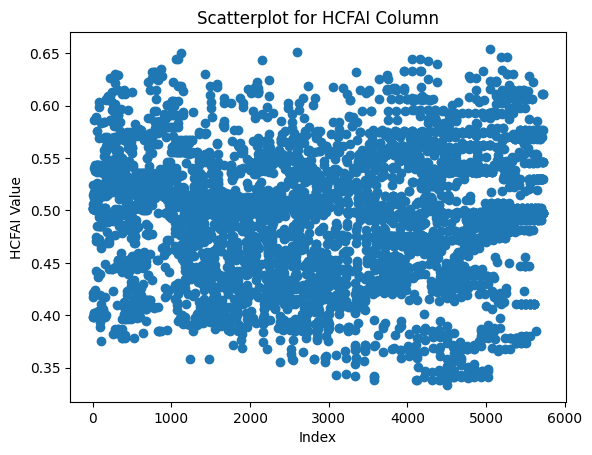

In [15]:
# Scatterplot for the 'HCFAI' column
plt.scatter(x.index, x['HCFAI'])
plt.title('Scatterplot for HCFAI Column')
plt.xlabel('Index')
plt.ylabel('HCFAI Value')
plt.show()

# Feasibility Factors

In [16]:
# a = a['buildability_landcov'].notna()
a = df[['Road_Presence', 'POI_Presence', 'RHU_Presence', 'buildability_landcov',
       'drought_value', 'rain intensity_value', 'flood_probability_value', 'HCFAI']]

a = a[a['RHU_Presence']==0]
a = a.sort_values(by='HCFAI', ascending=False)
a

,Road_Presence,POI_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
5048,1,1,0,1.0,0.960775,0.430949,0.687815,0.654064
2596,1,1,0,1.0,1.141953,0.249932,0.361025,0.651058
1121,1,1,0,1.0,1.111672,0.289567,0.461596,0.650529
5267,1,0,0,1.0,0.848824,0.427353,0.224119,0.645940
5194,1,0,0,1.0,0.848824,0.427353,0.224119,0.645939
...,...,...,...,...,...,...,...,...
5590,0,0,0,NaN,1.046655,0.516940,0.426333,NaN
5591,0,0,0,NaN,1.088014,0.533677,0.440750,NaN
5596,1,1,0,NaN,0.864514,2.721783,0.598195,NaN
5680,0,1,0,NaN,0.797894,2.648136,1.438344,NaN


# Maximal Coverage Factors

In [21]:
b = df[['popden_you', 'popden_wom', 'popden_eld', 'popden_chi',
       'popden_w_1', 'popden_all', 'Distance_to_Nearest_RHU_km', 'RHU_Presence', 'HCFAI']]
# b = b[b['buildability_landcov']==1]
b = b.sort_values(by='HCFAI', ascending=False)
# b[b['RHU_Presence']==1]
b

,popden_you,popden_wom,popden_eld,popden_chi,popden_w_1,popden_all,Distance_to_Nearest_RHU_km,RHU_Presence,HCFAI
5048,13.736079,41.149321,8.824771,8.173794,20.816993,363.896997,17.384668,0,0.654064
2596,5.296137,14.032293,2.747063,3.143041,6.904777,155.815402,31.481358,0,0.651058
1121,28.689414,77.553834,12.481618,19.290638,36.829012,125.914306,11.550333,0,0.650529
5267,0.000000,0.000000,0.000000,0.000000,0.000000,41.771628,25.204817,0,0.645940
5194,0.000000,0.000000,0.000000,0.000000,0.000000,124.261193,23.798066,0,0.645939
...,...,...,...,...,...,...,...,...,...
5590,0.000000,0.000000,0.000000,0.000000,0.000000,176.080449,19.736373,0,NaN
5591,0.000000,0.000000,0.000000,0.000000,0.000000,27.348926,19.029579,0,NaN
5596,46.984025,121.805750,14.989535,29.475215,64.996635,370.507160,15.552309,0,NaN
5680,0.000000,0.000000,0.000000,0.000000,0.000000,4.127558,18.802216,0,NaN


# EDA

In [ ]:
c=df['HCFAI'].notna()
c = df[c]
# c = df[['population_youth', 'population_women', 'population_elder60plus', 'population_children_under5',
#        'population_reproductive_women', 'popden_all_total_population', 'Distance_to_Nearest_RHU_km',
#         'Road_Presence', 'POI_Presence', 'RHU_Presence', 'buildability_landcov', 'drought_value', 'rain intensity_value',
#         'flood_probability_value', 'HCFAI']]
# c = c[c['RHU_Presence']==1]
c = c.sort_values(by='HCFAI', ascending=False)
c = c[['population_youth', 'population_women', 'population_elder60plus', 'population_children_under5',
       'population_reproductive_women', 'popden_all_total_population', 'Distance_to_Nearest_RHU_km',
        'Road_Presence', 'POI_Presence', 'RHU_Presence', 'buildability_landcov', 'drought_value', 'rain intensity_value',
        'flood_probability_value', 'HCFAI']]
c.sort_values(by='HCFAI', ascending=False)

,population_youth,population_women,population_elder60plus,population_children_under5,population_reproductive_women,popden_all_total_population,Distance_to_Nearest_RHU_km,Road_Presence,POI_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
5703,0.000000,0.000000,0.0,0.000000,0.000000,376.429135,18.697599,1,0,0,1.0,0.542848,2.371210,0.962631,0.581876
1099,0.000000,0.000000,0.0,0.000000,0.000000,466.445625,24.862448,0,0,0,1.0,0.672856,0.268539,0.305392,0.563102
4334,0.000000,0.000000,0.0,0.000000,0.000000,1139.223628,29.861002,0,0,0,1.0,0.713175,0.153043,0.229447,0.534900
2704,0.000000,0.000000,0.0,0.000000,0.000000,23.816927,10.621421,0,0,0,1.0,0.834131,0.092033,0.815355,0.521743
3490,0.000000,0.000000,0.0,0.000000,0.000000,693.544396,13.991199,0,0,0,1.0,0.884191,0.099185,0.681102,0.516955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3900,11520.305136,21600.533088,0.0,2880.050256,12960.330264,50247.186329,2.858075,0,0,0,0.0,0.783897,2.857803,0.389312,0.481524
3937,0.000000,0.000000,0.0,0.000000,0.000000,2736.210123,11.314957,0,0,0,1.0,0.795406,1.766906,1.284616,0.480502
944,0.000000,0.000000,0.0,0.000000,0.000000,5875.884038,10.289214,0,0,0,0.0,0.686629,0.277878,0.934151,0.473992
5,0.000000,0.000000,0.0,0.000000,0.000000,4021.250203,16.685262,0,0,0,0.0,0.800627,1.151205,0.700863,0.467737


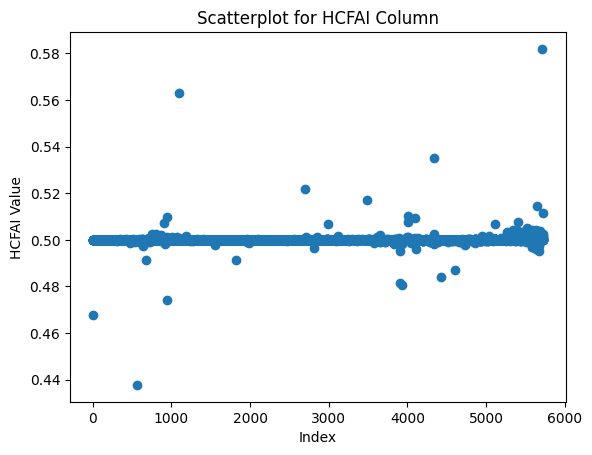

In [ ]:
# Scatterplot for the 'HCFAI' column
plt.scatter(c.index, c['HCFAI'])
plt.title('Scatterplot for HCFAI Column')
plt.xlabel('Index')
plt.ylabel('HCFAI Value')
plt.show()

# Exporting

In [22]:
# Specify the file path for the CSV file
csv_file_path = '/content/drive/MyDrive/MS thesis/HFCAI/rg1-HCFAI.csv'
# Export the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)
print(f'DataFrame exported to CSV file: {csv_file_path}')

DataFrame exported to CSV file: /content/drive/MyDrive/MS thesis/HFCAI/rg1-HCFAI.csv
